In [ ]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 45.5 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eshitazjigyasu","key":"0f48a145090a1674da677e10e22aebe3"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 91% 161M/178M [00:00<00:00, 194MB/s]
100% 178M/178M [00:00<00:00, 202MB/s]


In [ ]:
!unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [ ]:
df=pd.get_dummies(df,columns=["type"])

In [ ]:
df.drop(["nameOrig"],axis=1,inplace=True)

In [ ]:
df["nameDest_type"]=df["nameDest"].str[:1]

In [ ]:
df.drop(["nameDest"],axis=1,inplace=True)

In [ ]:
df=pd.get_dummies(df,columns=["nameDest_type"])

In [ ]:
df.drop(["nameDest_type_C"],axis=1,inplace=True)

In [ ]:
df.drop(["step"],axis=1,inplace=True)

In [ ]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_type_M
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,True
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,True
2,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,False
3,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,False
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,False
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,False
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,False
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,False


In [ ]:
df.shape

(6362620, 13)

In [ ]:
df_isFraud=df[df["isFraud"]==1]
df_isNotFraud=df[df["isFraud"]==0]

In [ ]:
df_isNotFraud=df_isNotFraud.sample(n=len(df_isFraud))
df_isNotFraud

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_type_M
1817706,307546.47,9933.00,0.00,0.00,307546.47,0,0,False,True,False,False,False,False
2515510,3146.92,88.00,0.00,1260835.02,1263981.93,0,0,False,True,False,False,False,False
1069472,701.27,19532.00,18830.73,302497.44,303198.71,0,0,False,False,True,False,False,False
2188209,244375.97,0.00,0.00,739757.04,984133.01,0,0,False,True,False,False,False,False
454041,345179.39,3882528.99,4227708.38,1154798.59,809619.19,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237087,105089.50,0.00,0.00,314902.83,1202962.43,0,0,False,False,False,False,True,False
5707988,40899.13,20887.00,0.00,0.00,0.00,0,0,False,False,False,True,False,True
2814243,134439.78,11516.00,145955.78,0.00,0.00,0,0,True,False,False,False,False,False
2762823,218682.69,2304301.37,2522984.05,255377.79,36695.10,0,0,True,False,False,False,False,False


In [ ]:
df2=pd.concat([df_isFraud,df_isNotFraud])
df2

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_type_M
2,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,False
3,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,False
251,2806.00,2806.00,0.00,0.00,0.00,1,0,False,False,False,False,True,False
252,2806.00,2806.00,0.00,26202.00,0.00,1,0,False,True,False,False,False,False
680,20128.00,20128.00,0.00,0.00,0.00,1,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237087,105089.50,0.00,0.00,314902.83,1202962.43,0,0,False,False,False,False,True,False
5707988,40899.13,20887.00,0.00,0.00,0.00,0,0,False,False,False,True,False,True
2814243,134439.78,11516.00,145955.78,0.00,0.00,0,0,True,False,False,False,False,False
2762823,218682.69,2304301.37,2522984.05,255377.79,36695.10,0,0,True,False,False,False,False,False


In [ ]:
df2=df2.sample(frac=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = df2.drop('isFraud', axis=1), df2[['isFraud']]
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_type_M
5158502,133590.95,0.00,0.00,318948.13,452539.08,0,False,True,False,False,False,False
1973180,308143.54,0.00,0.00,716829.77,1024973.31,0,False,True,False,False,False,False
6191773,326492.90,11567.00,0.00,587957.98,914450.89,0,False,True,False,False,False,False
6178569,13359.31,226749.89,213390.58,0.00,0.00,0,False,False,False,True,False,True
1059528,46081.45,46081.45,0.00,0.00,0.00,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5994347,207021.45,207021.45,0.00,0.00,207021.45,0,False,True,False,False,False,False
1030297,438224.60,438224.60,0.00,0.00,0.00,0,False,False,False,False,True,False
3076579,149336.01,591122.00,740458.01,0.00,0.00,0,True,False,False,False,False,False
1892495,9809.38,7076.00,0.00,171841.11,181650.49,0,False,True,False,False,False,False


In [ ]:
y

,isFraud
5158502,0
1973180,0
6191773,0
6178569,0
1059528,1
...,...
5994347,1
1030297,1
3076579,0
1892495,0


In [ ]:
y=y.values.ravel()

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.shape

(12319, 12)

In [ ]:
len(y_train)

12319

In [ ]:
X_test.shape

(4107, 12)

In [ ]:
len(y_test)

4107

In [ ]:
y.shape

(16426,)

In [ ]:
import xgboost as xgb

# Create regression matrices
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
dtest_clf.get_label()

array([0., 0., 1., ..., 1., 0., 0.], dtype=float32)

In [ ]:
params = {"objective": "binary:logistic", "tree_method": "gpu_hist"}
n = 1000

results = xgb.train(
   params, dtrain_clf,
   num_boost_round=n,
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:20:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:23:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Accuracy: 0.99


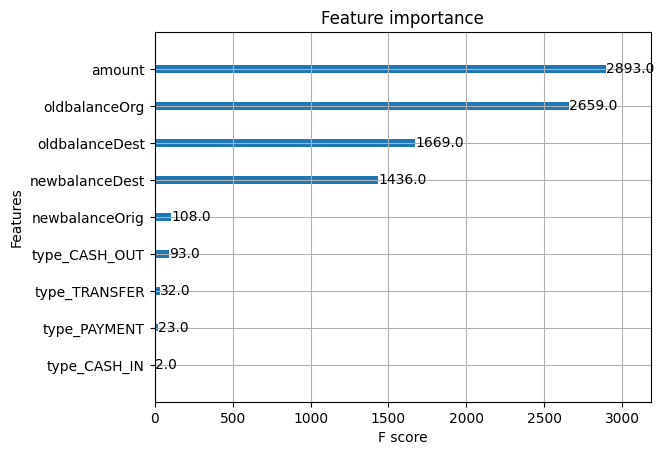

In [ ]:
# Make predictions
preds = results.predict(dtest_clf)
predictions = [1 if value > 0.5 else 0 for value in preds]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Optional: plot feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(results)
plt.show()